# Creating model

In [1]:
from keras import layers
from keras.models import Sequential

In [2]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu" ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

model compile

In [4]:
from keras import optimizers

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate= 1e-4), metrics="accuracy")


data geeration

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_directory = "../datasets/catdog/train/"
validation_directory = "../datasets/catdog/validation/"

In [7]:
train_generator = train_datagen.flow_from_directory(train_directory, target_size=(150,150), batch_size=20, class_mode="binary")

validation_genarator = validation_datagen.flow_from_directory(validation_directory, target_size=(150,150),batch_size=20, class_mode="binary")

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


training

In [8]:
history = model.fit(train_generator, epochs=20, validation_data=validation_genarator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 28s 221ms/step - loss: 0.6872 - accuracy: 0.5423 - val_loss: 0.6742 - val_accuracy: 0.5760
Epoch 2/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6596 - accuracy: 0.6028 - val_loss: 0.6393 - val_accuracy: 0.6240
Epoch 3/20
100/100 [==============================] - 14s 142ms/step - loss: 0.6094 - accuracy: 0.6723 - val_loss: 0.6233 - val_accuracy: 0.6540
Epoch 4/20
100/100 [==============================] - 25s 253ms/step - loss: 0.5591 - accuracy: 0.7164 - val_loss: 0.6048 - val_accuracy: 0.6670
Epoch 5/20
100/100 [==============================] - 10s 96ms/step - loss: 0.5234 - accuracy: 0.7414 - val_loss: 0.6132 - val_accuracy: 0.6600
Epoch 6/20
100/100 [==============================] - 10s 97ms/step - loss: 0.4937 - accuracy: 0.7674 - val_loss: 0.6194 - val_accuracy: 0.6720
Epoch 7/20
100/100 [==============================] - 20s 199ms/step - loss: 0.4659 - accuracy: 0.7774 - val_loss: 0.5567 - val_accu

visualization

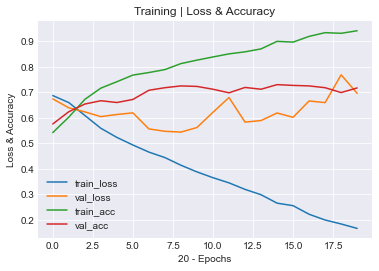

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure()

epochs = 20
plt.plot(np.arange(0, epochs), history.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label = "val_loss")

plt.plot(np.arange(0, epochs), history.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label = "val_acc")

plt.title("Training | Loss & Accuracy")
plt.xlabel("20 - Epochs")
plt.ylabel("Loss & Accuracy")
plt.legend()
plt.show()

In [20]:
model.save("cat_dog_first.h5")

overfiting
----------------
1. new model
2. data augmentation

create new model

In [10]:
model_x = Sequential()

model_x.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (150,150,3)))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(64, (3,3), activation="relu" ))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation="relu" ))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation="relu" ))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Flatten())
model_x.add(layers.Dropout(rate=0.4))
model_x.add(layers.Dense(512, activation="relu"))
model_x.add(layers.Dense(1, activation="sigmoid"))

model_x.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [11]:
model_x.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate= 1e-4), metrics="accuracy")


Image Data Augmentation

In [16]:
train_datagen_x = ImageDataGenerator(rescale= 1./255, rotation_range= 45,  width_shift_range=0.3, height_shift_range=0.3 , shear_range=0.3, zoom_range=0.3,  horizontal_flip = True, vertical_flip=True, fill_mode="nearest")

validation_datagen_x = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator_x = train_datagen_x.flow_from_directory(train_directory, target_size=(150,150), batch_size=16, class_mode="binary")

validation_genarator_x = validation_datagen_x.flow_from_directory(validation_directory, target_size=(150,150),batch_size=16, class_mode="binary")

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history_x = model_x.fit(train_generator_x, epochs=100, validation_data=validation_genarator_x, validation_steps=50) #steps_per_epoch = 100

Epoch 1/100
125/125 [==============================] - 25s 181ms/step - loss: 0.6961 - accuracy: 0.4892 - val_loss: 0.6881 - val_accuracy: 0.4963
Epoch 2/100
125/125 [==============================] - 15s 122ms/step - loss: 0.6891 - accuracy: 0.5378 - val_loss: 0.6736 - val_accuracy: 0.5575
Epoch 3/100
125/125 [==============================] - 23s 188ms/step - loss: 0.6816 - accuracy: 0.5458 - val_loss: 0.6689 - val_accuracy: 0.5713
Epoch 4/100
125/125 [==============================] - 25s 198ms/step - loss: 0.6782 - accuracy: 0.5708 - val_loss: 0.6641 - val_accuracy: 0.6125
Epoch 5/100
125/125 [==============================] - 24s 194ms/step - loss: 0.6689 - accuracy: 0.5858 - val_loss: 0.6923 - val_accuracy: 0.5688
Epoch 6/100
125/125 [==============================] - 24s 191ms/step - loss: 0.6605 - accuracy: 0.5903 - val_loss: 0.6583 - val_accuracy: 0.5863
Epoch 7/100
125/125 [==============================] - 20s 163ms/step - loss: 0.6521 - accuracy: 0.6093 - val_loss: 0.6292 -

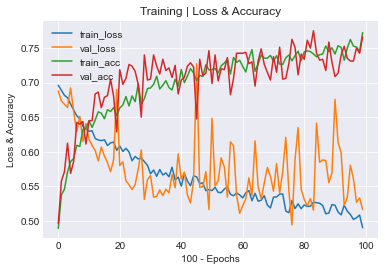

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure()

epochs = 100
plt.plot(np.arange(0, epochs), history_x.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), history_x.history["val_loss"], label = "val_loss")

plt.plot(np.arange(0, epochs), history_x.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, epochs), history_x.history["val_accuracy"], label = "val_acc")

plt.title("Training | Loss & Accuracy")
plt.xlabel("100 - Epochs")
plt.ylabel("Loss & Accuracy")
plt.legend()
plt.show()

In [22]:
model_x.save("cat_dog_last.h5")

Prediction

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [49]:
model_path = "./cat_dog_last.h5"
image_path = "../datasets/catdog/test/cats/1513.jpg"

In [50]:
prediction_model = load_model(model_path)
test_img = load_img(image_path, target_size=(150,150))

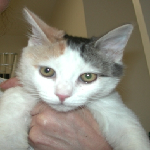

In [51]:
test_img

In [52]:
print(test_img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x1F296F5C1C0>


In [53]:
test_img = img_to_array(test_img)
test_img.shape

(150, 150, 3)

In [54]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 150, 150, 3)

In [55]:
train_generator_x.class_indices

{'cats': 0, 'dogs': 1}

In [56]:
result = prediction_model.predict(test_img)
result

1/1 [==============================] - 0s 109ms/step


array([[0.]], dtype=float32)

In [57]:
if result[0,0] > 0.5:
    label = "Dog"
    print(label)
else:
    label = "Cat"
    print(label)

Cat


In [58]:
import cv2

test_img = cv2.imread(image_path)
cv2.putText(test_img, label, (20,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
cv2.imshow("Prediction", test_img)

cv2.waitKey(5000)
cv2.destroyAllWindows()